<a href="https://colab.research.google.com/github/ahmadbadawikr/DS_and_ML/blob/master/Dicoding_Submission_Intermediate_Final_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import shutil
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile,os
local_zip = '/content/drive/My Drive/dataset/Intel_Image_dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/dataset')
zip_ref.close()
 
base_dir = '/dataset/seg_train/seg_train'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
os.mkdir(train_dir)
os.mkdir(validation_dir)
building_dir = os.path.join(base_dir,'buildings')
forest_dir = os.path.join(base_dir,'forest')
glacier_dir = os.path.join(base_dir,'glacier')
mountain_dir = os.path.join(base_dir,'mountain')
sea_dir = os.path.join(base_dir,'sea')
street_dir = os.path.join(base_dir,'street')

FileExistsError: ignored

In [ ]:
train_building_dir, val_building_dir = train_test_split(os.listdir(building_dir), test_size = 0.2)
train_forest_dir, val_forest_dir = train_test_split(os.listdir(forest_dir), test_size = 0.2)
train_glacier_dir, val_glacier_dir = train_test_split(os.listdir(glacier_dir), test_size = 0.2)
train_mountain_dir, val_mountain_dir = train_test_split(os.listdir(mountain_dir), test_size = 0.2)
train_sea_dir, val_sea_dir = train_test_split(os.listdir(sea_dir), test_size = 0.2)
train_street_dir, val_street_dir = train_test_split(os.listdir(street_dir), test_size = 0.2)

In [ ]:
train_buildings = os.path.join(train_dir, 'buildings')
train_forest = os.path.join(train_dir, 'forest')
train_glacier = os.path.join(train_dir, 'glacier')
train_mountain = os.path.join(train_dir, 'mountain')
train_sea = os.path.join(train_dir, 'sea')
train_street = os.path.join(train_dir, 'street')

val_buildings = os.path.join(validation_dir, 'buildings')
val_forest = os.path.join(validation_dir, 'forest')
val_glacier = os.path.join(validation_dir, 'glacier')
val_mountain = os.path.join(validation_dir, 'mountain')
val_sea = os.path.join(validation_dir, 'sea')
val_street = os.path.join(validation_dir, 'street')

os.mkdir(train_buildings)
os.mkdir(train_forest)
os.mkdir(train_glacier)
os.mkdir(train_mountain)
os.mkdir(train_sea)
os.mkdir(train_street)

os.mkdir(val_buildings)
os.mkdir(val_forest)
os.mkdir(val_glacier)
os.mkdir(val_mountain)
os.mkdir(val_sea)
os.mkdir(val_street)

In [ ]:
for file in train_building_dir:
  shutil.copy(os.path.join(building_dir, file), os.path.join(train_buildings, file))
for file in train_forest_dir:
  shutil.copy(os.path.join(forest_dir,file), os.path.join(train_forest,file))
for file in train_glacier_dir:
  shutil.copy(os.path.join(glacier_dir,file), os.path.join(train_glacier,file))
for file in train_mountain_dir:
  shutil.copy(os.path.join(mountain_dir, file), os.path.join(train_mountain, file))
for file in train_sea_dir:
  shutil.copy(os.path.join(sea_dir,file), os.path.join(train_sea,file))
for file in train_street_dir:
  shutil.copy(os.path.join(street_dir,file), os.path.join(train_street,file))

for file in val_building_dir:
  shutil.copy(os.path.join(building_dir, file), os.path.join(val_buildings,file))
for file in val_forest_dir:
  shutil.copy(os.path.join(forest_dir,file), os.path.join(val_forest,file))
for file in val_glacier_dir:
  shutil.copy(os.path.join(glacier_dir,file), os.path.join(val_glacier,file))
for file in val_mountain_dir:
  shutil.copy(os.path.join(mountain_dir, file), os.path.join(val_mountain,file))
for file in val_sea_dir:
  shutil.copy(os.path.join(sea_dir,file), os.path.join(val_sea,file))
for file in val_street_dir:
  shutil.copy(os.path.join(street_dir,file), os.path.join(val_street,file))

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),  
        batch_size=16,
        class_mode='categorical',
        shuffle=True)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='categorical',
        shuffle=True)

Found 11224 images belonging to 6 classes.
Found 2810 images belonging to 6 classes.


In [ ]:
from tensorflow.keras import applications
from tensorflow.keras import models, layers
from keras import Sequential 

pretrained_model = applications.InceptionResNetV2(
    weights="imagenet", 
    include_top=False, 
    input_shape=(150, 150, 3)
)

for layer in pretrained_model.layers[:-1]:
  layer.trainable = False

pretrained_model.summary()

#pretrained_model.trainable = False

model = models.Sequential()

model.add(pretrained_model)

model.add(layers.Conv2D(input_shape=(150,150,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(1,1)))
model.add(layers.Flatten())
model.add(layers.Dense(units=512,activation="relu"))
model.add(layers.Dense(6, activation="softmax"))


model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_615 (Conv2D)             (None, 74, 74, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_609 (BatchN (None, 74, 74, 32)   96          conv2d_615[0][0]                 
__________________________________________________________________________________________________
activation_609 (Activation)     (None, 74, 74, 32)   0           batch_normalization_609[0][0]    
________________________________________________________________________________

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.RMSprop(),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=0, mode='auto')

In [ ]:
hist = model.fit(train_generator,steps_per_epoch=25,epochs=150,validation_data=validation_generator,validation_steps=3,verbose=1,callbacks=[early,reduce_lr])

Epoch 1/150
25/25 [==============================] - 42s 2s/step - loss: 0.5311 - accuracy: 0.7850 - val_loss: 0.3671 - val_accuracy: 0.8542
Epoch 2/150
25/25 [==============================] - 41s 2s/step - loss: 0.4611 - accuracy: 0.8450 - val_loss: 0.7059 - val_accuracy: 0.7083
Epoch 3/150
25/25 [==============================] - 43s 2s/step - loss: 0.5068 - accuracy: 0.8025 - val_loss: 0.4857 - val_accuracy: 0.8333
Epoch 4/150
25/25 [==============================] - 41s 2s/step - loss: 0.5365 - accuracy: 0.7875 - val_loss: 0.4625 - val_accuracy: 0.8750
Epoch 5/150
25/25 [==============================] - 41s 2s/step - loss: 0.5399 - accuracy: 0.8025 - val_loss: 0.6203 - val_accuracy: 0.8333
Epoch 6/150
25/25 [==============================] - 41s 2s/step - loss: 0.5066 - accuracy: 0.8200 - val_loss: 0.5354 - val_accuracy: 0.8542
Epoch 7/150
25/25 [==============================] - 42s 2s/step - loss: 0.5017 - accuracy: 0.7925 - val_loss: 0.2666 - val_accuracy: 0.9167
Epoch 8/150
2

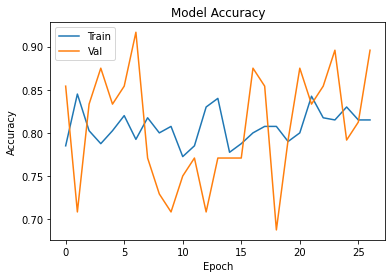

In [ ]:
#Visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

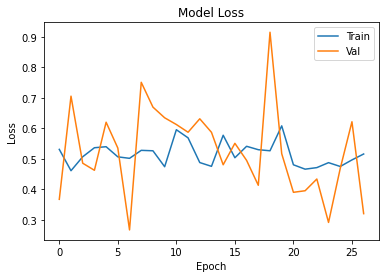

In [ ]:
#Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmphedsn951/assets


In [ ]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)